In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
metadata_df = pd.read_csv("metadata.tsv", delimiter="\t")

In [3]:
metadata_df.columns

Index(['ID', 'Accession', 'Assay name', 'Assay title',
       'Biosample classification', 'Target', 'Target of assay',
       'Target gene symbol', 'Biosample summary', 'Biosample term name',
       'Dbxrefs', 'Description', 'Lab', 'Project', 'Status', 'Files',
       'Related series', 'Biosample accession', 'Biological replicate',
       'Technical replicate', 'Linked antibody', 'Organism', 'Life stage',
       'Biosample age', 'Biosample treatment',
       'Biosample treatment ontology ID', 'Biosample treatment amount',
       'Biosample treatment amount units', 'Biosample treatment duration',
       'Biosample treatment duration units', 'Synchronization',
       'Post-synchronization time', 'Post-synchronization time units',
       'Biosample modification site target organism',
       'Biosample modification site introduced gene organism', 'Replicates',
       'Mixed biosamples', 'Cellular component',
       'Library construction platform', 'Library construction method'],
      dtyp

In [4]:
def extract_age(description):
    match = re.search(r'\((\d+)\s+years\)', description)
    if match:
        return int(match.group(1))
    return None

In [5]:
def extract_sex(description):
    match = re.search(r'\b(male|female)\b', description, re.IGNORECASE)
    if match:
        return match.group(1).lower()
    return None

Use this column to extract the relevant information

In [6]:
metadata_df['Biosample summary'][0]

'Homo sapiens heart left ventricle tissue nuclear fraction male adult (31 years)'

In [22]:
metadata_df.iloc[:, 13:55].head()

,Project,Status,Files,Related series,Biosample accession,Biological replicate,Technical replicate,Linked antibody,Organism,Life stage,...,Post-synchronization time units,Biosample modification site target organism,Biosample modification site introduced gene organism,Replicates,Mixed biosamples,Cellular component,Library construction platform,Library construction method,age,sex
0,ENCODE,released,"/files/ENCFF886WKX/,/files/ENCFF969KPL/,/files...",/multiomics-series/ENCSR954THM/,ENCBS505KRY,1,1,NaN,Homo sapiens,adult,...,NaN,NaN,NaN,/replicates/edd709ec-849a-4794-a8df-f5902854513f/,NaN,nucleus,10X Genomics Chromium Controller,NaN,31,male
1,ENCODE,released,"/files/ENCFF054TZP/,/files/ENCFF905JLX/,/files...",/multiomics-series/ENCSR707XPP/,ENCBS835HEM,1,1,NaN,Homo sapiens,adult,...,NaN,NaN,NaN,/replicates/dd2d4e1d-4a37-41c1-97d0-d34986580d89/,NaN,nucleus,10X Genomics Chromium Controller,NaN,41,male
2,ENCODE,released,"/files/ENCFF955XWD/,/files/ENCFF439KKH/,/files...",/multiomics-series/ENCSR956ZER/,ENCBS056RAF,1,1,NaN,Homo sapiens,adult,...,NaN,NaN,NaN,/replicates/00999200-976a-43cc-948c-ca8ab69fa076/,NaN,nucleus,10X Genomics Chromium Controller,NaN,66,male
3,ENCODE,released,"/files/ENCFF249CVG/,/files/ENCFF972KER/,/files...",/multiomics-series/ENCSR487MGY/,ENCBS528MOI,1,1,NaN,Homo sapiens,adult,...,NaN,NaN,NaN,/replicates/d2f2af95-ce91-4325-824a-6e36188f140c/,NaN,nucleus,10X Genomics Chromium Controller,NaN,42,female
4,ENCODE,released,"/files/ENCFF710ZJC/,/files/ENCFF043SEJ/,/files...",/multiomics-series/ENCSR305JVN/,ENCBS210THB,1,1,NaN,Homo sapiens,adult,...,NaN,NaN,NaN,/replicates/563d07f5-149c-4466-b1f4-4dba1ac7a61c/,NaN,nucleus,10X Genomics Chromium Controller,NaN,68,male


In [8]:
metadata_df['age'] = metadata_df['Biosample summary'].apply(extract_age)

In [9]:
metadata_df['sex'] = metadata_df['Biosample summary'].apply(extract_sex)

In [10]:
metadata_df.shape

(54, 42)

### Examine the age distribution

(array([ 2.,  2.,  5.,  2.,  6.,  5.,  8.,  6.,  6., 12.]),
 array([20. , 24.9, 29.8, 34.7, 39.6, 44.5, 49.4, 54.3, 59.2, 64.1, 69. ]),
 <BarContainer object of 10 artists>)

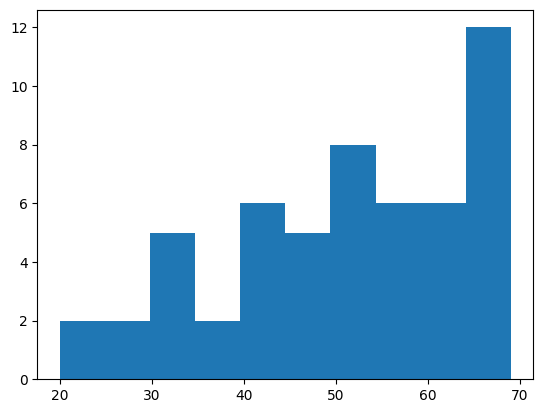

In [11]:
plt.hist(metadata_df['age'])

#### There are 54 donors that are largely skewed towards the older population

In [12]:
np.quantile(metadata_df['age'], q = [0, 0.25, 0.5, 0.75, 1])

array([20.  , 41.25, 52.  , 62.75, 69.  ])

Text(0.5, 1.0, 'Age and sex distribution of snRNA ENCODE LV sample \n (Snyder Lab)')

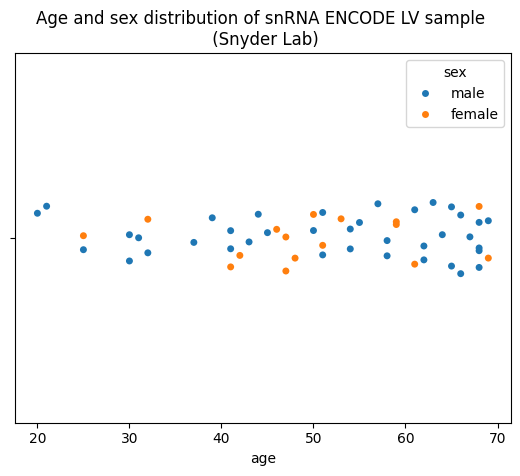

In [13]:
sns.stripplot(data = metadata_df, x = 'age', hue = 'sex')
plt.title("Age and sex distribution of snRNA ENCODE LV sample \n (Snyder Lab)")

#### Filter the metadata

In [14]:
metadata_df

,ID,Accession,Assay name,Assay title,Biosample classification,Target,Target of assay,Target gene symbol,Biosample summary,Biosample term name,...,Post-synchronization time units,Biosample modification site target organism,Biosample modification site introduced gene organism,Replicates,Mixed biosamples,Cellular component,Library construction platform,Library construction method,age,sex
0,/experiments/ENCSR814LMX/,ENCSR814LMX,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/edd709ec-849a-4794-a8df-f5902854513f/,NaN,nucleus,10X Genomics Chromium Controller,NaN,31,male
1,/experiments/ENCSR630LZS/,ENCSR630LZS,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/dd2d4e1d-4a37-41c1-97d0-d34986580d89/,NaN,nucleus,10X Genomics Chromium Controller,NaN,41,male
2,/experiments/ENCSR012APQ/,ENCSR012APQ,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/00999200-976a-43cc-948c-ca8ab69fa076/,NaN,nucleus,10X Genomics Chromium Controller,NaN,66,male
3,/experiments/ENCSR763BII/,ENCSR763BII,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/d2f2af95-ce91-4325-824a-6e36188f140c/,NaN,nucleus,10X Genomics Chromium Controller,NaN,42,female
4,/experiments/ENCSR002SMQ/,ENCSR002SMQ,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/563d07f5-149c-4466-b1f4-4dba1ac7a61c/,NaN,nucleus,10X Genomics Chromium Controller,NaN,68,male
5,/experiments/ENCSR540DHJ/,ENCSR540DHJ,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/e1e61a3b-1519-4d38-8e27-930ea019270c/,NaN,nucleus,10X Genomics Chromium Controller,NaN,53,female
6,/experiments/ENCSR654MFX/,ENCSR654MFX,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/758e861c-163d-4565-b108-7c6966b2d276/,NaN,nucleus,10X Genomics Chromium Controller,NaN,58,male
7,/experiments/ENCSR237HWJ/,ENCSR237HWJ,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/0cd4dc1b-ee1c-4be5-b857-e6be7e3cffbc/,NaN,nucleus,10X Genomics Chromium Controller,NaN,64,male
8,/experiments/ENCSR008CVR/,ENCSR008CVR,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/cd5816a2-2621-4fe5-8520-a8fd6808c37a/,NaN,nucleus,10X Genomics Chromium Controller,NaN,67,male
9,/experiments/ENCSR273JWD/,ENCSR273JWD,single-cell RNA sequencing assay,snRNA-seq,tissue,NaN,NaN,NaN,Homo sapiens heart left ventricle tissue nucle...,heart left ventricle,...,NaN,NaN,NaN,/replicates/962b61e3-db75-450f-8436-8de5e4440b20/,NaN,nucleus,10X Genomics Chromium Controller,NaN,39,male


In [15]:
filtered_metadata_df = metadata_df[["ID", "Accession", "age", "sex"]]
filtered_metadata_df.head()

,ID,Accession,age,sex
0,/experiments/ENCSR814LMX/,ENCSR814LMX,31,male
1,/experiments/ENCSR630LZS/,ENCSR630LZS,41,male
2,/experiments/ENCSR012APQ/,ENCSR012APQ,66,male
3,/experiments/ENCSR763BII/,ENCSR763BII,42,female
4,/experiments/ENCSR002SMQ/,ENCSR002SMQ,68,male


In [19]:
filtered_metadata_df.to_csv("filtered_metadata.tsv")